


A must read (https://sifter.org/~simon/journal/20061211.html)

##### Movie Rankings on kaggle

https://www.kaggle.com/cast42/simple-svd-movie-recommender/data


**ratings_small.csv**: The subset of 100,000 ratings from 671 users on 9,066 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here (https://grouplens.org/datasets/movielens/latest/)


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("data/kaggle/TheMovies"))

#sparse SVD
from scipy.sparse.linalg import svds

# Any results you write to the current directory are saved as output.

['ratings_small.csv.gz']


In [4]:
ratings = pd.read_csv('data/kaggle/TheMovies/ratings_small.csv.gz')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


#### Create a user/movie ranking matrix

Use the pandas *groupby* command along with *unstack*.
For now, replace missing values with 0, which is suboptimal. A better way would be as follows:

It's possible to approximate the SVD of a matrix with missing values using an iterative procedure:

1. Fill in the missing values with a rough approximation (e.g. replace them with the column means)
2. Perform SVD on the filled-in matrix
3. Reconstruct the data matrix from the SVD in order to get a better approximation of the missing values
4. Repeat steps 2-3 until convergence

This is a form of expectation maximization (EM) algorithm, where the E step updates the estimates of the missing values from the SVD, and the M step computes the SVD on the updated estimate of the data matrix (see [Section 1.3](https://www.cs.uic.edu/~liub/KDD-cup-2007/proceedings/missing-value-Kurucz.pdf) here for more details).

In [29]:
user_item = 

In [25]:
#user_item

#### What dimensions do you expect this matrix to have ?

In [26]:
user_item.

(671, 9066)

#### What are the top rated movies for user 42

In [34]:
user_item.

movieId
7502    5.0
1196    5.0
1097    5.0
318     5.0
589     5.0
Name: 42, dtype: float64

#### Compute the SVD

Think about centering your data

Keep only 50 components

In [30]:
U, sigma, Vt = 

In [10]:
U.shape

(671, 50)

In [11]:
Vt.shape

(50, 9066)

In [12]:
sigma_diag_matrix=np.diag(sigma)

#### Barplot the first ? singular values

<Container object of 50 artists>

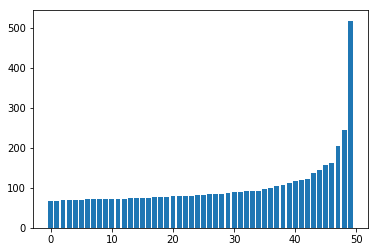

In [52]:
import matplotlib.pyplot as plt
plt.bar()

#### Predict the ratings for all users based on this truncated SVD

In [13]:
all_user_predicted_ratings = np.dot()
#all_user_predicted_ratings_demeaned = all_user_predicted_ratings +  user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_item.columns, index=user_item.index)

In [32]:
preds_df.shape
all_user_predicted_ratings.shape

(671, 9066)

In [15]:
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.057419,0.044156,-0.003525,-0.014026,-0.011693,0.037647,-0.011436,-0.012794,0.017412,0.037456,...,-0.001519,0.000171,0.016497,0.000130,0.000195,-0.013686,0.024746,-0.000700,-0.000420,-0.003038
2,0.397099,1.422453,-0.175735,0.166606,0.269432,0.385791,0.068086,0.043673,-0.004759,2.241940,...,-0.002005,0.000998,-0.007596,0.000552,0.000828,-0.059196,-0.011395,0.005804,0.003482,-0.004010
3,1.275403,0.296807,0.033442,-0.010834,0.100854,0.062972,-0.088911,0.009645,-0.002955,0.227495,...,-0.002610,-0.004553,-0.011604,0.000279,0.000419,-0.008031,-0.017406,0.008379,0.005027,-0.005219
4,1.183095,1.016435,0.105598,0.074721,-0.337196,-1.433923,-0.337587,-0.154619,-0.056599,1.551431,...,0.023616,0.008438,0.058714,0.003375,0.005062,0.150868,0.088071,-0.023062,-0.013837,0.047233
5,1.338518,1.510306,0.655975,-0.030616,0.764755,-0.159291,0.009004,0.054437,-0.134904,0.396755,...,0.001700,-0.000225,0.016028,0.006308,0.009463,-0.005235,0.024042,0.013163,0.007898,0.003400


#### Get top recommended movies for users  which have not been rated yet

movieId
1198    4.206618
1240    2.835051
1197    2.066835
1265    2.044307
380     1.958318
Name: 217, dtype: float64

In [44]:
def get_high_recommended_movies(userId):
    

In [45]:
get_high_recommended_movies(42)

set()

In [46]:
get_high_recommended_movies(314)

set()

In [47]:
get_high_recommended_movies(217)

{1198}

In [ ]:
# User 217 should go watching movie 1198: we expect a rating of 4.2!
preds_df.loc[217, 1198]